In [8]:
import sys
import os

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [9]:
# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.env.env import CustomBlackjackEnv

# Set up TensorFlow to avoid common warnings/issues
# This is often useful in notebooks
import tensorflow as tf
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv(render_mode=None, num_decks=6, blackjack_payout=1.5,
                         allow_doubling=False, allow_splitting=False, count_cards=True)

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

Observation space: (player_current_sum, dealer_card_showing, usable_ace, running_count)
Action space: 0: Stand, 1: Hit
Derived state size: 4, number of actions: 2


In [11]:
# Define parameters for the DQN Model
dqn_params = {
    "state_size": state_size,                
    "num_actions": num_actions,            
    "num_decks": env.num_decks,
    "learning_rate": 1e-4,
    "gamma": 0.99,
    "epsilon_start": 1.0,
    "epsilon_end": 0.005,
    "epsilon_decay": 0.9995,
    "replay_buffer_capacity": 25000,
    "target_update_freq": 500,
    "use_card_count": True
}

# Define training parameters for the .fit method
training_params = {
    "num_episodes": 50000,
    "batch_size": 64,
    "log_interval": 2500
}

In [ ]:
print("--- Training DQN Agent ---")

# Initialize with default parameters from settings.py
dqn_agent = DQNAgent(**dqn_params)# Pass params using **kwargs

# Start training
print(f"Starting DQN training for {training_params['num_episodes']} episodes...")
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass params using **kwargs
print("DQN training complete.")

# Save the trained model weights
dqn_agent.save_weights('models/dqn_blackjack.weights.h5')

--- Training DQN Agent ---
Starting DQN training for 50000 episodes...
Episode 2500/50000, Avg Reward (last 2500): -0.2404, Epsilon: 0.286


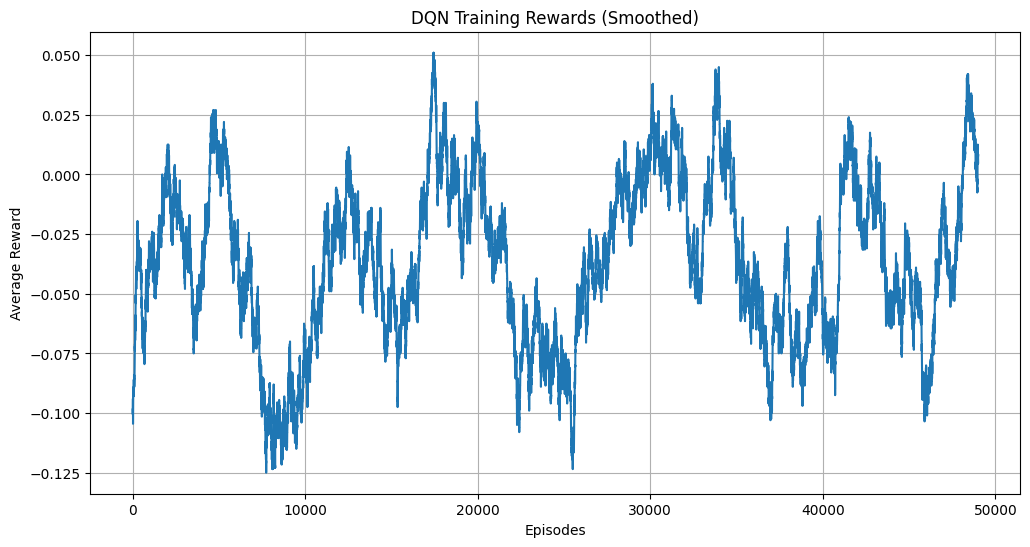

In [ ]:
from src.utils.helpers import smooth

# Plotting the smoothed rewards
plt.figure(figsize=(12, 6))
plt.plot(smooth(dqn_rewards_history, w=1000)) # Use a smoothing window, e.g., 1000 episodes
plt.title("DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [ ]:
print("\n--- Evaluating DQN Agent ---")
eval_dqn_agent = DQNAgent(**dqn_params)
eval_dqn_agent.load_weights('models/dqn_blackjack.weights.h5')
dqn_win_rate, dqn_push_rate, dqn_loss_rate = eval_dqn_agent.evaluate(env, num_eval_episodes=10000)


--- Evaluating DQN Agent ---
DQN model weights loaded from models/dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...
  Evaluation episode 1000/10000
  Evaluation episode 2000/10000
  Evaluation episode 3000/10000
  Evaluation episode 4000/10000
  Evaluation episode 5000/10000
  Evaluation episode 6000/10000
  Evaluation episode 7000/10000
  Evaluation episode 8000/10000
  Evaluation episode 9000/10000
  Evaluation episode 10000/10000

--- Evaluation Results ---
Total Episodes: 10000
Wins: 3843 (38.43%)
Pushes: 813 (8.13%)
Losses: 5344 (53.44%)
--------------------------


In [ ]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(**dqn_params)

# You can reuse training_params or define new ones
print(f"Starting Double DQN training for {training_params['num_episodes']} episodes...")
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)
print("Double DQN training complete.")

# Save the trained model weights
double_dqn_agent.save_weights('models/double_dqn_blackjack.weights.h5')


--- Training Double DQN Agent ---
DoubleDQNAgent initialized.
Starting Double DQN training for 50000 episodes...
Episode 2500/50000, Avg Reward (last 2500): -0.1112, Epsilon: 0.001
Episode 5000/50000, Avg Reward (last 2500): -0.0510, Epsilon: 0.001
Episode 7500/50000, Avg Reward (last 2500): -0.0390, Epsilon: 0.001
Episode 10000/50000, Avg Reward (last 2500): -0.0414, Epsilon: 0.001
Episode 12500/50000, Avg Reward (last 2500): -0.0534, Epsilon: 0.001
Episode 15000/50000, Avg Reward (last 2500): -0.0318, Epsilon: 0.001
Episode 17500/50000, Avg Reward (last 2500): -0.0610, Epsilon: 0.001
Episode 20000/50000, Avg Reward (last 2500): -0.0496, Epsilon: 0.001
Episode 22500/50000, Avg Reward (last 2500): -0.0424, Epsilon: 0.001
Episode 25000/50000, Avg Reward (last 2500): -0.0430, Epsilon: 0.001
Episode 27500/50000, Avg Reward (last 2500): -0.0146, Epsilon: 0.001
Episode 30000/50000, Avg Reward (last 2500): -0.0534, Epsilon: 0.001
Episode 32500/50000, Avg Reward (last 2500): -0.0308, Epsilon

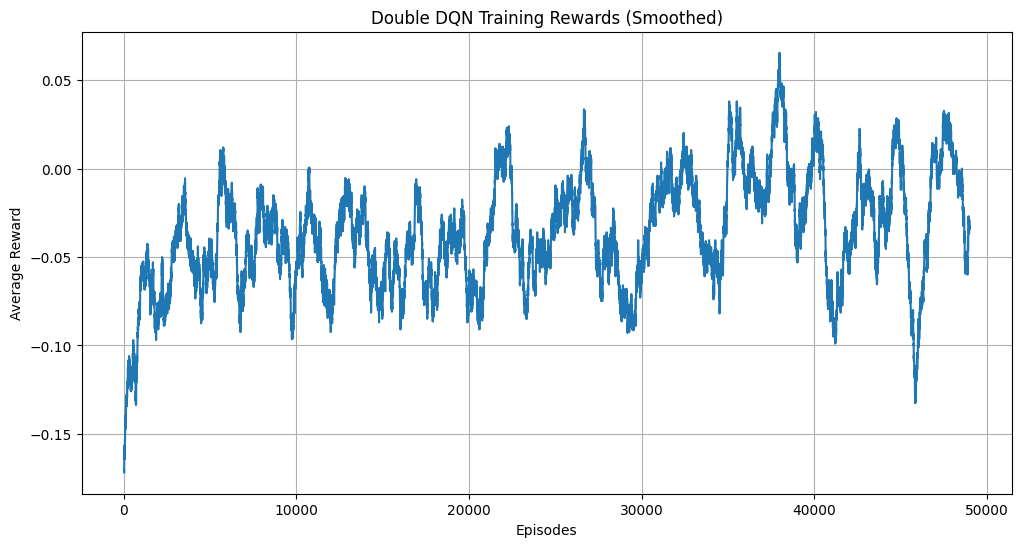

In [ ]:
if 'double_dqn_rewards_history' in locals():
    plt.figure(figsize=(12, 6))
    plt.plot(smooth(double_dqn_rewards_history, w=1000))
    plt.title("Double DQN Training Rewards (Smoothed)")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()

In [ ]:
if 'double_dqn_rewards_history' in locals():
    print("\n--- Evaluating Double DQN Agent ---")
    eval_double_dqn_agent = DoubleDQNAgent(**dqn_params)
    eval_double_dqn_agent.load_weights('models/double_dqn_blackjack.weights.h5')
    double_dqn_win_rate, double_dqn_push_rate, double_dqn_loss_rate = eval_double_dqn_agent.evaluate(env, num_eval_episodes=10000)


--- Evaluating Double DQN Agent ---
DoubleDQNAgent initialized.
DQN model weights loaded from models/double_dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...
  Evaluation episode 1000/10000
  Evaluation episode 2000/10000
  Evaluation episode 3000/10000
  Evaluation episode 4000/10000
  Evaluation episode 5000/10000
  Evaluation episode 6000/10000
  Evaluation episode 7000/10000
  Evaluation episode 8000/10000
  Evaluation episode 9000/10000
  Evaluation episode 10000/10000

--- Evaluation Results ---
Total Episodes: 10000
Wins: 3882 (38.82%)
Pushes: 848 (8.48%)
Losses: 5270 (52.70%)
--------------------------


In [ ]:
env.close()
print("Environment closed.")

Environment closed.
